Here I performed the watershed algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
original_coffee = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_segment/coffee_grains.jpg")

In [ ]:
coffee = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_segment/coffee_grains.jpg", cv2.IMREAD_GRAYSCALE)

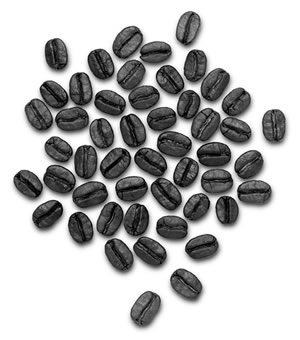

In [ ]:
cv2_imshow(coffee)

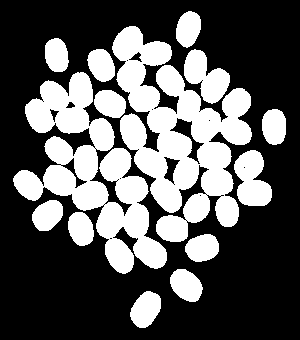

In [ ]:
thresh = cv2.threshold(coffee, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

In [ ]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [ ]:
def erosion(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      minimum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel < minimum):
            #update the minimum
            minimum = pixel
      output_img[r][c] = minimum

  return output_img

In [ ]:
def dilation(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      maximum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel > maximum):
            #update the maximum
            maximum = pixel
      output_img[r][c] = maximum

  return output_img

In [ ]:
def opening(input_img, i):
  step1 = erosion(input_img, i)
  step2 = dilation(step1, i)
  return step2

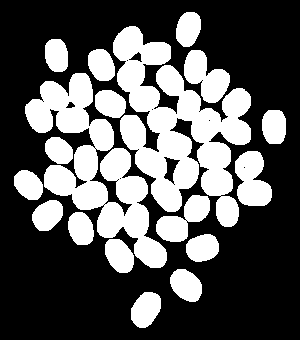

In [ ]:
opening = opening(thresh, 3)
cv2_imshow(opening)

In [ ]:
# Find the background using distance transform and thresholding
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, foreground = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

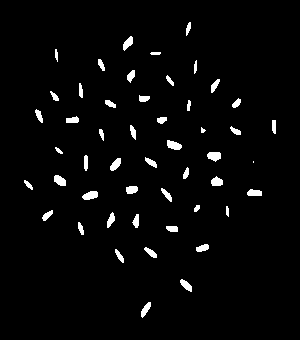

In [ ]:
cv2_imshow(foreground)

In [ ]:
# Find the unknown region using dilation
foreground = np.uint8(foreground)
unknown = cv2.subtract(opening, foreground)

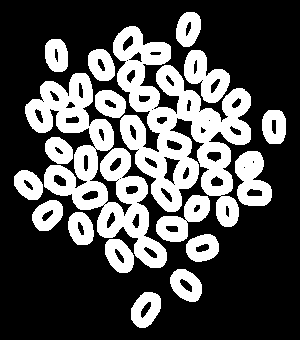

In [ ]:
cv2_imshow(unknown)

In [ ]:
# Create markers for watershed segmentation
ret, markers = cv2.connectedComponents(foreground)
markers += 1
markers[unknown==255] = 0

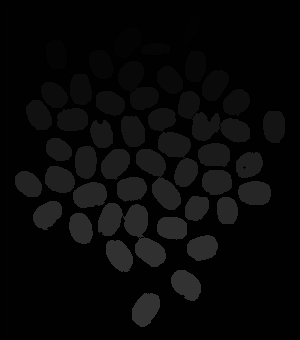

In [ ]:
cv2_imshow(markers)

In [ ]:
# Apply watershed segmentation
markers = cv2.watershed(original_coffee, markers)

# Draw the segmented regions on the original image
original_coffee[markers == -1] = [255, 0, 0]

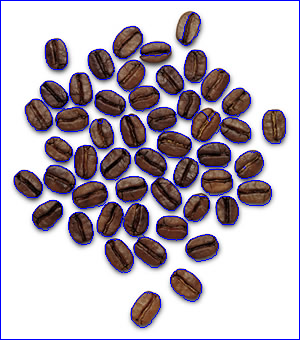

In [ ]:
cv2_imshow(original_coffee)